# 🧠 Linear Regression with Custom and SKLearn Implementations

In this notebook, we implement and compare linear regression models using:

- **Synthetic data** generated with Gaussian noise
- **SKLearn**'s built-in `LinearRegression`
- **Manual gradient descent** optimization
- **Stochastic gradient descent (SGD)**
  
Evaluation metrics and visualizations are included for comparison.

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from colorama import Fore, Style
from numpy.typing import NDArray
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 📊 Generate Dataset

In [130]:
def generate_data(
    n: int, w: float, b: float, noise_level: float = 1.0, seed: int = 42
) -> tuple[NDArray[np.float64], NDArray[np.float64]]:
    """Generate synthetic linear data with Gaussian noise.

    Args:
        n (int): Number of data points to generate.
        w (float): Slope of the linear function.
        b (float): Intercept of the linear function.
        noise_level (float): Standard deviation of Gaussian noise added to the data.
        seed (int): Seed for the random number generator.

    Returns:
        tuple[NDArray[np.float64], NDArray[np.float64]]: Tuple containing the list of x
        values and corresponding noisy y values.
    """
    rng = np.random.default_rng(seed)
    x = rng.uniform(0, 10, n)
    y = w * x + b + rng.normal(0, noise_level, n)
    return x, y


# Set true parameters of the linear relationship
w = 2.5  # Slope coefficient
b = 1.5  # Intercept (bias term)

# Generate dataset
x, y = generate_data(n=1000, w=w, b=b, noise_level=4.5)

In [131]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Convert lists to numpy arrays with correct shape for sklearn
X_train_np = np.array(X_train).reshape(-1, 1)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test).reshape(-1, 1)
y_test_np = np.array(y_test)

## ⚙️ SKLearn Model

In [132]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_np, y_train)

# Predict on test data
predicted = model.predict(X_test_np)

# Print model parameters
print(f"{Fore.BLUE}Model coefficients:{Style.RESET_ALL} {model.coef_}")
print(f"{Fore.MAGENTA}Intercept:{Style.RESET_ALL} {model.intercept_}")

Model coefficients: [2.59330092]
Intercept: 0.6699655985101742


In [133]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

# Display metrics with colored output
print(f"{Fore.CYAN}Mean Absolute Error (MAE):{Style.RESET_ALL} {mae:.4f}")
print(f"{Fore.CYAN}Mean Squared Error (MSE):{Style.RESET_ALL} {mse:.4f}")
print(f"{Fore.CYAN}R² Score:{Style.RESET_ALL} {r2:.4f}")

Mean Absolute Error (MAE): 3.9909
Mean Squared Error (MSE): 24.8548
R² Score: 0.7007


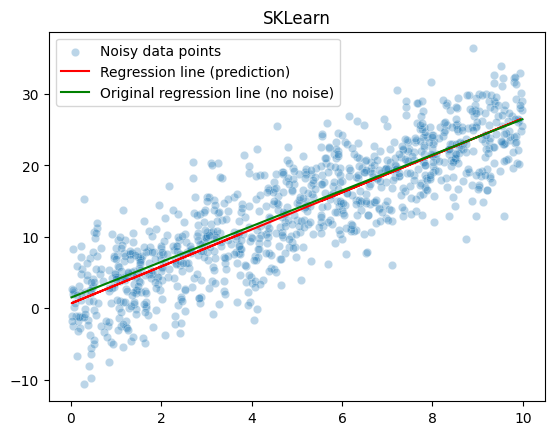

In [134]:
# Prepare data for plotting the true underlying line (without noise)
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_line = b + x_range * w

# Plot noisy data points and regression lines
sns.scatterplot(x=x, y=y, alpha=0.3, label="Noisy data points")
plt.plot(X_test_np, predicted, color="red", label="Regression line (prediction)")
plt.plot(x_range, y_line, color="green", label="Original regression line (no noise)")
plt.title("SKLearn")
plt.legend()
plt.show()

## 🧪 Custom Implementations

### 🔁 Gradient Descent (Batch GB)

In [135]:
# Initialize parameters
max_epochs = 10000
alpha = 1e-4  # learning rate
tolerance = 1e-6

m, n_features = X_train_np.shape
w_pred = np.zeros(n_features)  # initial weight
b_pred = 0.0  # initial bias

prev_mse = float("inf")

for epoch in range(max_epochs):
    y_pred = X_train_np @ w_pred + b_pred
    error = y_pred - y_train_np

    grad_w = (1 / m) * X_train_np.T @ error
    grad_b = (1 / m) * np.sum(error)

    # Gradient descent update rules
    w_pred -= alpha * grad_w
    b_pred -= alpha * grad_b

    mse = np.mean(error**2)

    # Check for convergence
    if abs(prev_mse - mse) < tolerance:
        print(f"Converged at epoch {epoch}")
        break

    prev_mse = mse

# Predict on test data
predicted = X_test_np @ w_pred + b_pred

# Print model parameters
print(f"{Fore.BLUE}Model coefficients:{Style.RESET_ALL} {w_pred}")
print(f"{Fore.MAGENTA}Intercept:{Style.RESET_ALL} {b_pred}")

Converged at epoch 2423
Model coefficients: [2.63094758]
Intercept: 0.41723610587863336


In [136]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

# Display metrics with colored output
print(f"{Fore.CYAN}Mean Absolute Error (MAE):{Style.RESET_ALL} {mae:.4f}")
print(f"{Fore.CYAN}Mean Squared Error (MSE):{Style.RESET_ALL} {mse:.4f}")
print(f"{Fore.CYAN}R² Score:{Style.RESET_ALL} {r2:.4f}")

Mean Absolute Error (MAE): 3.9919
Mean Squared Error (MSE): 24.8874
R² Score: 0.7003


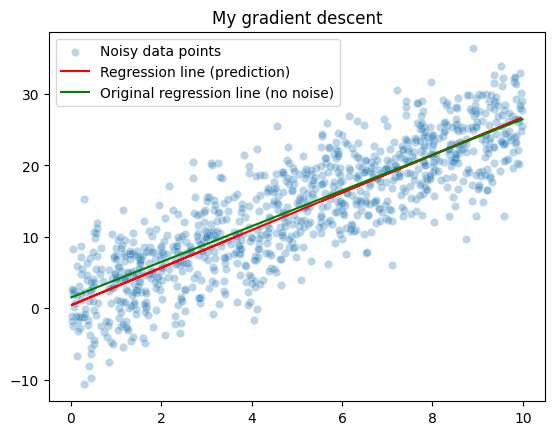

In [137]:
# Prepare data for plotting the true underlying line (without noise)
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_line = b + x_range * w

# Plot noisy data points and regression lines
sns.scatterplot(x=x, y=y, alpha=0.3, label="Noisy data points")
plt.plot(X_test_np, predicted, color="red", label="Regression line (prediction)")
plt.plot(x_range, y_line, color="green", label="Original regression line (no noise)")
plt.title("My gradient descent")
plt.legend()
plt.show()

### 🔄 Stochastic Gradient Descent (SGD)

In [138]:
# Initialize parameters
max_epochs = 10000
alpha = 1e-4  # learning rate
tolerance = 1e-6

m, n_features = X_train_np.shape
w_pred = np.zeros(n_features)  # initial weight
b_pred = 0.0  # initial bias

prev_mse = float("inf")

for epoch in range(max_epochs):
    indices = np.random.permutation(m)
    X_train_shuffled = X_train_np[indices]
    y_train_shuffled = y_train_np[indices]

    for i in range(m):
        xi = X_train_shuffled[i]
        yi = y_train_shuffled[i]

        y_pred = xi @ w_pred + b_pred
        error_i = y_pred - yi

        grad_w = xi * error_i
        grad_b = error_i

        # Gradient descent update rules
        w_pred -= alpha * grad_w
        b_pred -= alpha * grad_b

    y_pred = X_train_np @ w_pred + b_pred
    mse = np.mean((y_pred - y_train_np) ** 2)

    # Check for convergence
    if abs(prev_mse - mse) < tolerance:
        print(f"Converged at epoch {epoch}")
        break

    prev_mse = mse

# Predict on test data
predicted = X_test_np @ w_pred + b_pred

# Print model parameters
print(f"{Fore.BLUE}Model coefficients:{Style.RESET_ALL} {w_pred}")
print(f"{Fore.MAGENTA}Intercept:{Style.RESET_ALL} {b_pred}")

Converged at epoch 1440
Model coefficients: [2.59371994]
Intercept: 0.6694417888970708


In [139]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

# Display metrics with colored output
print(f"{Fore.CYAN}Mean Absolute Error (MAE):{Style.RESET_ALL} {mae:.4f}")
print(f"{Fore.CYAN}Mean Squared Error (MSE):{Style.RESET_ALL} {mse:.4f}")
print(f"{Fore.CYAN}R² Score:{Style.RESET_ALL} {r2:.4f}")

Mean Absolute Error (MAE): 3.9909
Mean Squared Error (MSE): 24.8546
R² Score: 0.7007


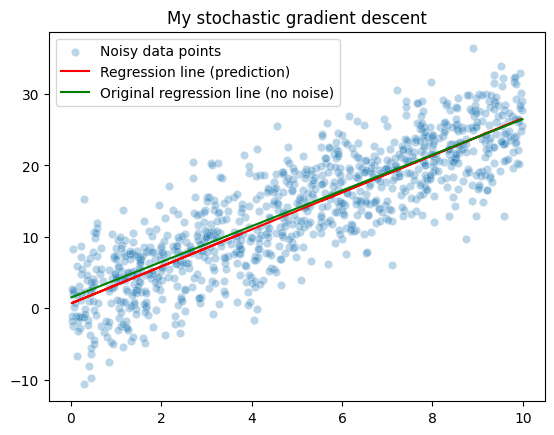

In [140]:
# Prepare data for plotting the true underlying line (without noise)
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_line = b + x_range * w

# Plot noisy data points and regression lines
sns.scatterplot(x=x, y=y, alpha=0.3, label="Noisy data points")
plt.plot(X_test_np, predicted, color="red", label="Regression line (prediction)")
plt.plot(x_range, y_line, color="green", label="Original regression line (no noise)")
plt.title("My stochastic gradient descent")
plt.legend()
plt.show()